# 1. Load and clean data
## Read data from CSV file

In [18]:
import pandas as pd

data = pd.read_csv("AfricaInternetUsers.csv")


## Remove the last 4 rows of dataframe

In [19]:
data = data[:-4]
data.tail()

,AFRICA,Population\n(2020 Est.),Internet\nUsers\n31-Dec-2000,Internet\nUsers\n30-SEPT-20,Penetration\n(% Population),Internet\nGrowth %\n2000 - 2020,Facebook\nsubscribers\n30-SEPT-2020
53,Tunisia,"11,818,619","100,000","7,898,534",66.8%,"7,798%","7,445,000"
54,Uganda,"45,741,007","40,000","18,502,166",40.4%,"46,155%","2,471,000"
55,Western Sahara,"597,339",NaN,"28,000",4.7%,NaN,"27,000"
56,Zambia,"18,383,955","20,000","9,870,427",53.7%,"49,252%","2,253,000"
57,Zimbabwe,"14,862,924","50,000","8,400,000",56.5%,"16,700%","994,000"


## Rename the columns in more readable form

In [20]:
data = data.rename(columns={"Population\n(2020 Est.)":"Population_2020_Est", "Internet\nUsers\n31-Dec-2000":"Internet_Users_31_Dec_2000","Internet\nUsers\n30-SEPT-20":"Internet_Users_30_SEPT_20","Penetration\n(% Population)":"Penetration_Population","Penetration_Population 	Internet\nGrowth %\n2000 - 2020":"Penetration_Population"})
data = data.rename(columns={"Internet\nGrowth %\n2000 - 2020":"Internet_Growth_2000_2020","Facebook\nsubscribers\n30-SEPT-2020":"Facebook_subscribers_30_SEPT_2020"})
data.head(2)

,AFRICA,Population_2020_Est,Internet_Users_31_Dec_2000,Internet_Users_30_SEPT_20,Penetration_Population,Internet_Growth_2000_2020,Facebook_subscribers_30_SEPT_2020
0,Algeria,"43,851,044","50,000","25,428,159",58.0%,"50,756%","24,730,000"
1,Angola,"32,866,272","30,000","8,980,670",27.3%,"29,835%","2,244,000"


## Fill missing value with 0 and delete "Internet_Growth_2000_2020" columns

In [21]:
data = data.fillna(0)
data.drop('Internet_Growth_2000_2020', axis=1, inplace=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   AFRICA                             58 non-null     object
 1   Population_2020_Est                58 non-null     object
 2   Internet_Users_31_Dec_2000         58 non-null     object
 3   Internet_Users_30_SEPT_20          58 non-null     object
 4   Penetration_Population             58 non-null     object
 5   Facebook_subscribers_30_SEPT_2020  58 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


## Convert to different data to good pandas datatype


In [24]:
data['Penetration_Population']= data['Penetration_Population'].apply(lambda x: str(x).strip("%")).astype(float)
number_col = ['Population_2020_Est','Internet_Users_31_Dec_2000','Internet_Users_30_SEPT_20','Facebook_subscribers_30_SEPT_2020']
for col in number_col:
    data[col] = data[col].apply(lambda x: str(x).replace(",","")).astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AFRICA                             58 non-null     object 
 1   Population_2020_Est                58 non-null     float64
 2   Internet_Users_31_Dec_2000         58 non-null     float64
 3   Internet_Users_30_SEPT_20          58 non-null     float64
 4   Penetration_Population             58 non-null     float64
 5   Facebook_subscribers_30_SEPT_2020  58 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


# 2. Apply method with pandas series

## Passed a built-in function to apply method

In [109]:
data['countries_name_length'] = data.AFRICA.apply(len)
data.head()

,AFRICA,Population_2020_Est,Internet_Users_31_Dec_2000,Internet_Users_30_SEPT_20,Penetration_Population,Facebook_subscribers_30_SEPT_2020,countries_name_length
0,Algeria,43851044.0,50000.0,25428159.0,58.0%,24730000.0,7
1,Angola,32866272.0,30000.0,8980670.0,27.3%,2244000.0,6
2,Benin,12123200.0,15000.0,3801758.0,31.4%,920000.0,5
3,Botswana,2351627.0,15000.0,1116079.0,47.5%,830000.0,8
4,Burkina Faso,20903273.0,10000.0,4594265.0,22.0%,840000.0,12


## Passe our custum function to apply method

In [119]:
def upercase(string):
    return string.upper()

data.AFRICA.apply(upercase).head()


0         ALGERIA
1          ANGOLA
2           BENIN
3        BOTSWANA
4    BURKINA FASO
Name: AFRICA, dtype: object

## Use lambda function to apply method

In [105]:
data.AFRICA.apply(lambda x: x.upper())
data.head()


,AFRICA,Population_2020_Est,Internet_Users_31_Dec_2000,Internet_Users_30_SEPT_20,Penetration_Population,Facebook_subscribers_30_SEPT_2020
0,Algeria,"43,851,044","50,000","25,428,159",58.0%,"24,730,000"
1,Angola,"32,866,272","30,000","8,980,670",27.3%,"2,244,000"
2,Benin,"12,123,200","15,000","3,801,758",31.4%,"920,000"
3,Botswana,"2,351,627","15,000","1,116,079",47.5%,"830,000"
4,Burkina Faso,"20,903,273","10,000","4,594,265",22.0%,"840,000"



## Remove % sign behind Penetration_Population values and convert it to float

In [120]:

data['Penetration_Population']= data['Penetration_Population'].apply(lambda x: str(x).strip("%")).astype(float)
data['Penetration_Population'].head()

0    58.0
1    27.3
2    31.4
3    47.5
4    22.0
Name: Penetration_Population, dtype: float64

##  Use aggregation function into apply method

In [121]:
print(data['Penetration_Population'].apply({'The mean is:':'mean',"Median is:":"median"}))
print(data['Penetration_Population'].apply(['std','min','max','median','sum']))

The mean is:    36.165517
Median is:      31.650000
Name: Penetration_Population, dtype: float64
std         21.742969
min          4.700000
max         87.200000
median      31.650000
sum       2097.600000
Name: Penetration_Population, dtype: float64


# 3. Iterating over DataFrame rows

###  iterrows()

In [38]:

for index, row in data.iterrows():
   print(index," : ", row[['Population_2020_Est','Penetration_Population']]) 



Algeria  :  Population_2020_Est       43,851,044
Penetration_Population          58.0
Name: Algeria, dtype: object
Angola  :  Population_2020_Est       32,866,272
Penetration_Population          27.3
Name: Angola, dtype: object
Benin  :  Population_2020_Est       12,123,200
Penetration_Population          31.4
Name: Benin, dtype: object
Botswana  :  Population_2020_Est       2,351,627
Penetration_Population         47.5
Name: Botswana, dtype: object
Burkina Faso  :  Population_2020_Est       20,903,273
Penetration_Population          22.0
Name: Burkina Faso, dtype: object
Burundi  :  Population_2020_Est       11,890,784
Penetration_Population           9.7
Name: Burundi, dtype: object
Cabo Verde  :  Population_2020_Est       555,987
Penetration_Population       63.3
Name: Cabo Verde, dtype: object
Cameroon  :  Population_2020_Est       26,545,863
Penetration_Population          29.7
Name: Cameroon, dtype: object
Central African Rep.  :  Population_2020_Est       4,829,767
Penetration_P

###  Itertuples

In [35]:
# data.head()
for row in data.itertuples(index=False, name="Data"):
    print(row)

Data(AFRICA='Algeria', Population_2020_Est='43,851,044', Internet_Users_31_Dec_2000='50,000', Internet_Users_30_SEPT_20='25,428,159', Penetration_Population=58.0, Internet_Growth_2000_2020='50,756%', Facebook_subscribers_30_SEPT_2020='24,730,000', countries_name_length=7)
Data(AFRICA='Angola', Population_2020_Est='32,866,272', Internet_Users_31_Dec_2000='30,000', Internet_Users_30_SEPT_20='8,980,670', Penetration_Population=27.3, Internet_Growth_2000_2020='29,835%', Facebook_subscribers_30_SEPT_2020='2,244,000', countries_name_length=6)
Data(AFRICA='Benin', Population_2020_Est='12,123,200', Internet_Users_31_Dec_2000='15,000', Internet_Users_30_SEPT_20='3,801,758', Penetration_Population=31.4, Internet_Growth_2000_2020='25,245%', Facebook_subscribers_30_SEPT_2020='920,000', countries_name_length=5)
Data(AFRICA='Botswana', Population_2020_Est='2,351,627', Internet_Users_31_Dec_2000='15,000', Internet_Users_30_SEPT_20='1,116,079', Penetration_Population=47.5, Internet_Growth_2000_2020='7

###  items()

In [89]:
for label, content in data.items():
    print(type(label),type(content))

<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>
<class 'str'> <class 'pandas.core.series.Series'>


In [41]:
data = data.set_index('AFRICA')

In [111]:
data.head()

,Population_2020_Est,Internet_Users_31_Dec_2000,Internet_Users_30_SEPT_20,Penetration_Population,Facebook_subscribers_30_SEPT_2020
AFRICA,,,,,
Algeria,43851044.0,50000.0,25428159.0,58.0,24730000.0
Cote d'Ivoire,26378274.0,40000.0,12253653.0,46.5,4758000.0
Egypt,102334404.0,450000.0,49231493.0,48.1,42400000.0
Ethiopia,114963588.0,10000.0,20507255.0,17.8,6007000.0
Ghana,31072940.0,30000.0,11737818.0,37.8,4900000.0
Kenya,53771296.0,200000.0,46870422.0,87.2,7000000.0
Libya,6871292.0,10000.0,5100000.0,74.2,5094000.0
Morocco,36910560.0,100000.0,23739581.0,64.3,18330000.0
Nigeria,206139589.0,200000.0,126078999.0,61.2,27120000.0


# 4. Pandas plotting

###  line plot

<AxesSubplot:title={'center':'Percentage of penetration of internet in Africa'}, xlabel='Africa Countries', ylabel='Percentage in %'>

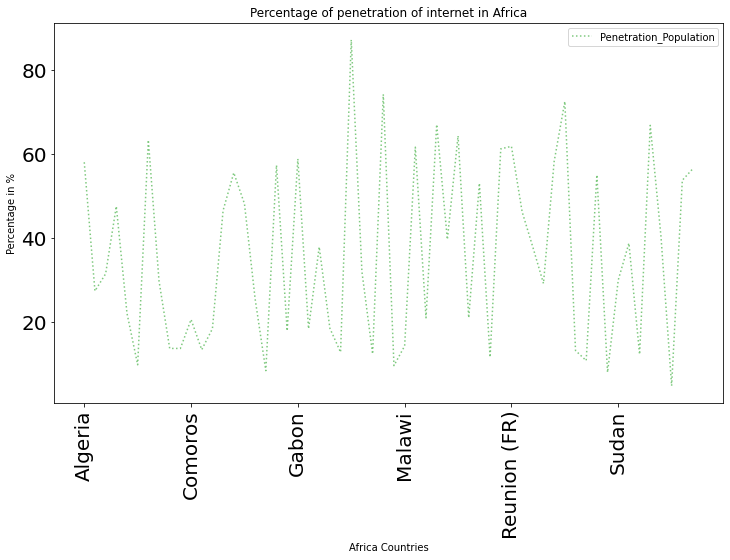

In [45]:
# data.plot(kind="line",  figsize=[7,14], legend=True)
# data['Penetration_Population'].hist(legend=True)

data.plot(y="Penetration_Population", figsize=[12,7], title="Percentage of penetration of internet in Africa", xlabel="Africa Countries", ylabel="Percentage in %", fontsize=20,style=":", rot=90, colormap="Accent", )


### 2. Hist

array([<AxesSubplot:title={'center':'Population_2020_Est'}, xlabel='AFRICA'>,
       <AxesSubplot:title={'center':'Internet_Users_31_Dec_2000'}, xlabel='AFRICA'>,
       <AxesSubplot:title={'center':'Internet_Users_30_SEPT_20'}, xlabel='AFRICA'>,
       <AxesSubplot:title={'center':'Penetration_Population'}, xlabel='AFRICA'>,
       <AxesSubplot:title={'center':'Facebook_subscribers_30_SEPT_2020'}, xlabel='AFRICA'>],
      dtype=object)

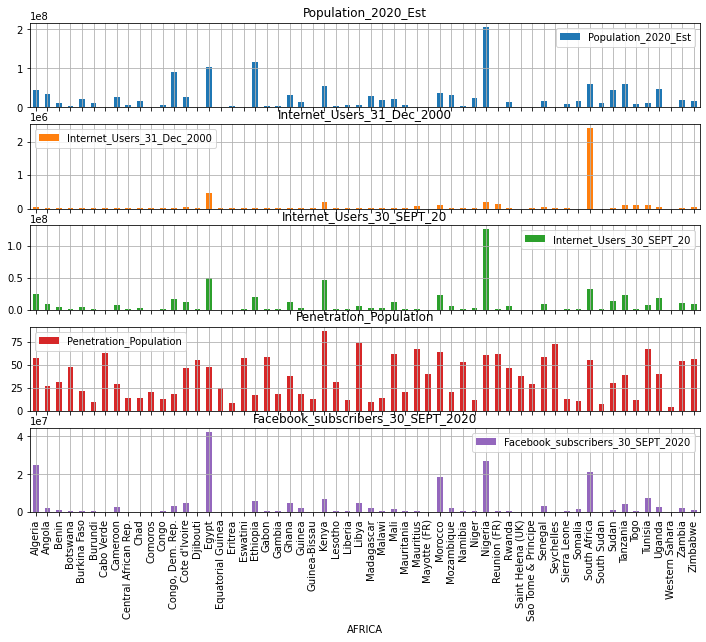

In [74]:
# data.head()
data.plot(kind="bar", figsize=[12,9], subplots=True, grid=True)

### 3. Pie plot

<AxesSubplot:ylabel='Penetration_Population'>

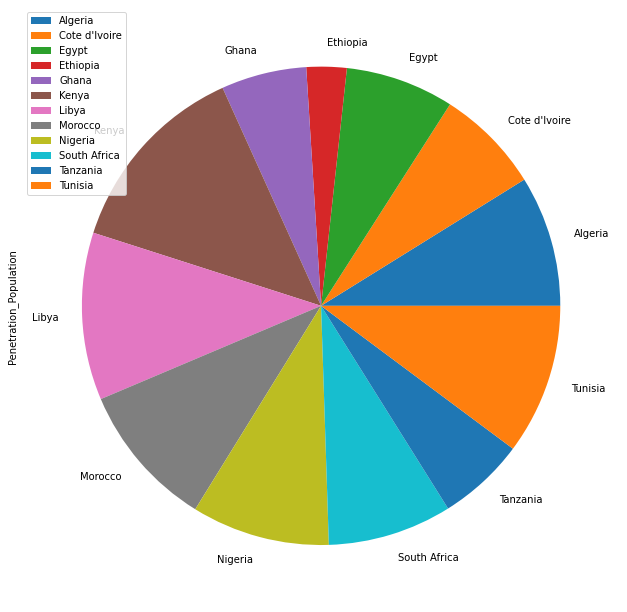

In [114]:
df = data[data['Facebook_subscribers_30_SEPT_2020'] >data['Facebook_subscribers_30_SEPT_2020'].mean()]
df.plot(kind="pie", y="Penetration_Population",legend=True, figsize=[11,11])

<AxesSubplot:>

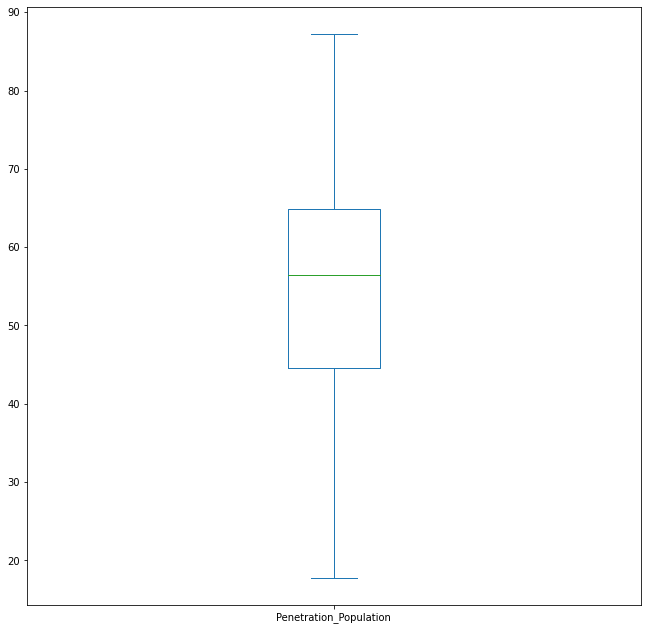

In [116]:
df = data[data['Facebook_subscribers_30_SEPT_2020'] >data['Facebook_subscribers_30_SEPT_2020'].mean()]
df.plot(kind="box", y="Penetration_Population",legend=True, figsize=[11,11])